In [1]:
#import the relevant python modules
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
import math
from dateutil.relativedelta import relativedelta
from sklearn import preprocessing
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
from sklearn import linear_model, svm

from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB

In [2]:
#load in our dataset using pandas 
adventure_works = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AdvWorksCusts.csv")
ave_month_spend = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AW_AveMonthSpend.csv")
bike_buyer = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AW_BikeBuyer.csv")


In [3]:
#combine the data
adventure_works['AveMonthSpend'] = ave_month_spend['AveMonthSpend']
adventure_works['BikeBuyer'] = bike_buyer['BikeBuyer']


In [4]:
#examine the data
adventure_works.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer
0,11000,NaN,Jon,V,Yang,NaN,3761 N. 14th St,NaN,Rockhampton,Queensland,...,Professional,M,M,1,0,0,2,137947,89,0
1,11001,NaN,Eugene,L,Huang,NaN,2243 W St.,NaN,Seaford,Victoria,...,Professional,M,S,0,1,3,3,101141,117,1
2,11002,NaN,Ruben,NaN,Torres,NaN,5844 Linden Land,NaN,Hobart,Tasmania,...,Professional,M,M,1,1,3,3,91945,123,0
3,11003,NaN,Christy,NaN,Zhu,NaN,1825 Village Pl.,NaN,North Ryde,New South Wales,...,Professional,F,S,0,1,0,0,86688,50,0
4,11004,NaN,Elizabeth,NaN,Johnson,NaN,7553 Harness Circle,NaN,Wollongong,New South Wales,...,Professional,F,S,1,4,5,5,92771,95,1


In [5]:
#what data types do we have
adventure_works.dtypes

CustomerID               int64
Title                   object
FirstName               object
MiddleName              object
LastName                object
Suffix                  object
AddressLine1            object
AddressLine2            object
City                    object
StateProvinceName       object
CountryRegionName       object
PostalCode              object
PhoneNumber             object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
dtype: object

In [6]:
#drop useless columns  right away
adventure_works.drop(['Title','FirstName',
                     'MiddleName','LastName',
                     'Suffix','AddressLine1',
                     'AddressLine2','PostalCode',
                     'PhoneNumber','City'],axis=1,inplace=True)

In [7]:
#covernt age from string to int
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'),pd.to_datetime(end))
    return '{}'.format(r.years)

adventure_works['Age'] = adventure_works['BirthDate'].apply(calculate_age)

# finally convert age to integer
adventure_works['Age'] = adventure_works['Age'].astype('int64')


In [8]:
adventure_works.dtypes

CustomerID               int64
StateProvinceName       object
CountryRegionName       object
BirthDate               object
Education               object
Occupation              object
Gender                  object
MaritalStatus           object
HomeOwnerFlag            int64
NumberCarsOwned          int64
NumberChildrenAtHome     int64
TotalChildren            int64
YearlyIncome             int64
AveMonthSpend            int64
BikeBuyer                int64
Age                      int64
dtype: object

In [9]:
#display summary statistics for numerical values
adventure_works.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age
count,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000,16519.000000
mean,20234.225195,0.673891,1.500999,0.992009,2.006235,78122.511532,72.405957,0.332284,59.353109
std,5342.515987,0.468802,1.138962,1.515048,1.682736,39710.985718,27.285370,0.471046,11.254971
min,11000.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,22.000000,0.000000,40.000000
25%,15604.500000,0.000000,1.000000,0.000000,0.000000,47807.500000,52.000000,0.000000,51.000000
50%,20221.000000,1.000000,2.000000,0.000000,2.000000,76120.000000,68.000000,0.000000,58.000000
75%,24860.500000,1.000000,2.000000,2.000000,3.000000,105194.500000,84.000000,1.000000,67.000000
max,29482.000000,1.000000,4.000000,5.000000,5.000000,196511.000000,176.000000,1.000000,111.000000


In [10]:
#print frequency table for for list of cat columns
def count_unique(adventure_works,cols):
    for col in cols:
        print('\n'+ 'For column' + col)
        print(adventure_works[col].value_counts())
        
#define our categorical columns
cat_cols = ['StateProvinceName',
           'CountryRegionName','Education',
           'Occupation','Gender','MaritalStatus']
#call our function
count_unique(adventure_works,cat_cols)


For columnStateProvinceName
California             3973
Washington             2038
England                1715
British Columbia       1401
New South Wales        1391
Oregon                  938
Victoria                805
Queensland              717
Saarland                391
Nordrhein-Westfalen     365
Seine (Paris)           344
Hessen                  334
Hamburg                 271
Seine Saint Denis       257
Nord                    248
South Australia         212
Bayern                  200
Hauts de Seine          169
Yveline                 149
Essonne                 133
Tasmania                 92
Seine et Marne           52
Loiret                   52
Moselle                  49
Brandenburg              27
Val d'Oise               27
Garonne (Haute)          26
Val de Marne             26
Somme                    20
Charente-Maritime        19
Loir et Cher             16
Pas de Calais            15
Alberta                  10
Illinois                  6
Ohio               

Occupation


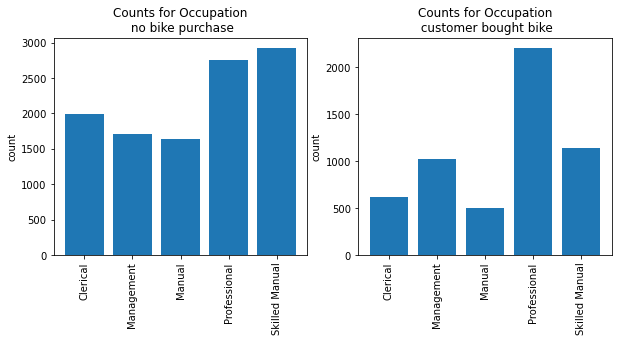

Gender


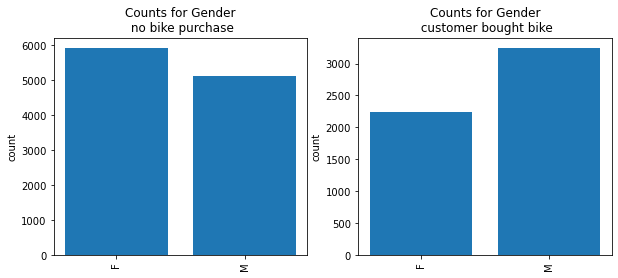

MaritalStatus


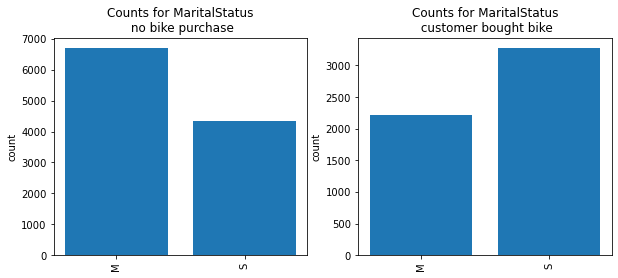

CountryRegionName


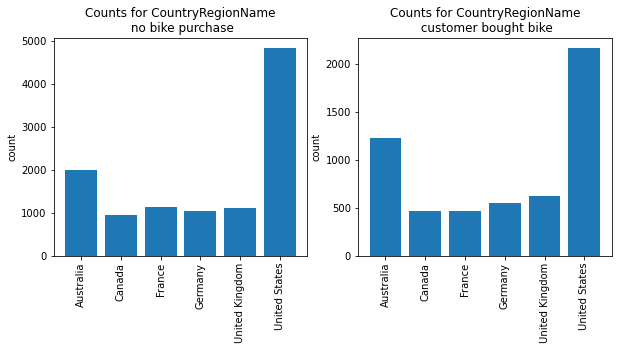

Education


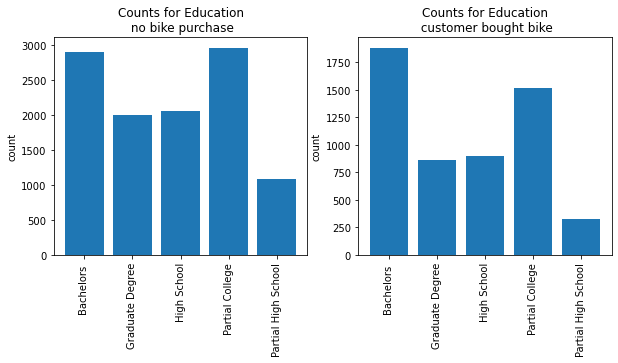

In [11]:
#plot a bar plot for categorical variables
#For those who bought and ddnt buy
cat_cols = ['Occupation','Gender','MaritalStatus','CountryRegionName','Education']

adventure_works['dummy'] = np.ones(shape = adventure_works.shape[0])
for col in cat_cols:
    print(col)
    counts = adventure_works[['dummy', 'BikeBuyer', col]].groupby(['BikeBuyer', col], as_index = False).count()
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    _ = plt.figure(figsize = (10,4))
    plt.subplot(1, 2, 1)
    temp = counts[counts['BikeBuyer'] == 0][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n no bike purchase')
    plt.ylabel('count')
    plt.subplot(1, 2, 2)
    temp = counts[counts['BikeBuyer'] == 1][[col, 'dummy']]
    plt.bar(temp[col], temp.dummy)
    plt.xticks(rotation=90)
    plt.title('Counts for ' + col + '\n customer bought bike')
    plt.ylabel('count')
    plt.show()

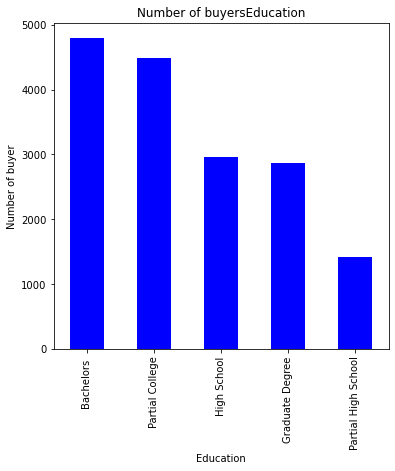

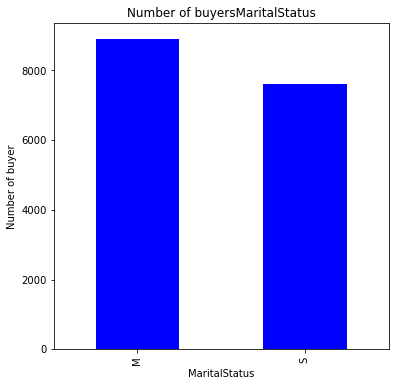

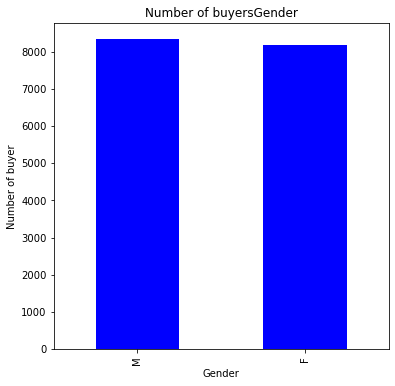

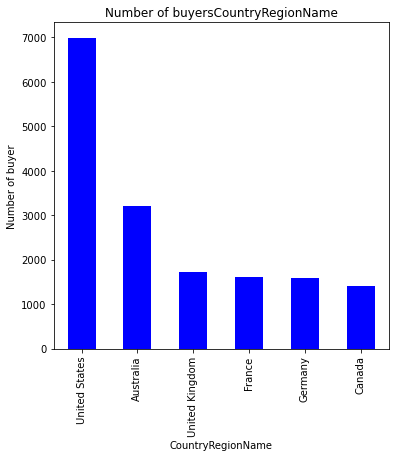

In [12]:
def plot_bars(adventure_works, cols):
    for col in cols:
        fig = plt.figure(figsize=(6,6)) # define plot area
        ax = fig.gca() # define axis    
        counts = adventure_works[col].value_counts() # find the counts for each unique category
        counts.plot.bar(ax = ax, color = 'blue') # Use the plot.bar method on the counts data frame
        ax.set_title('Number of buyers' + col) # Give the plot a main title
        ax.set_xlabel(col) # Set text for the x axis
        ax.set_ylabel('Number of buyer')# Set text for y axis
        plt.show()

plot_cols = ['Education', 'MaritalStatus', 'Gender','CountryRegionName']
plot_bars(adventure_works, plot_cols)

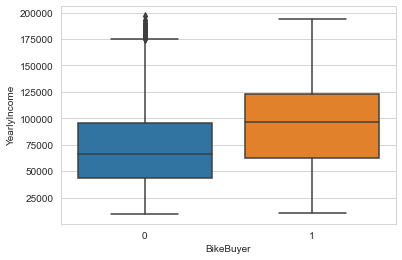

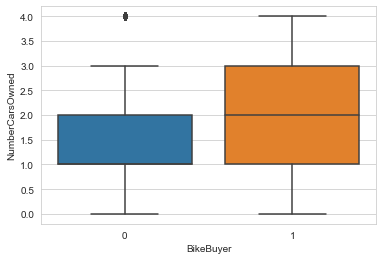

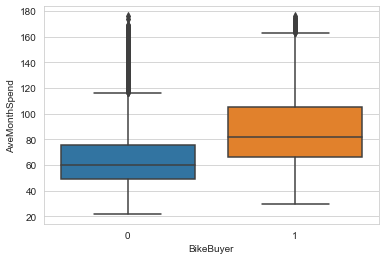

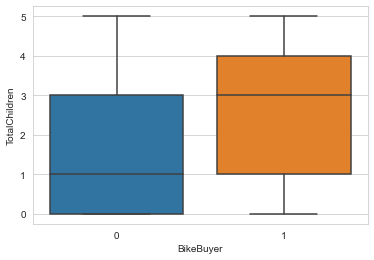

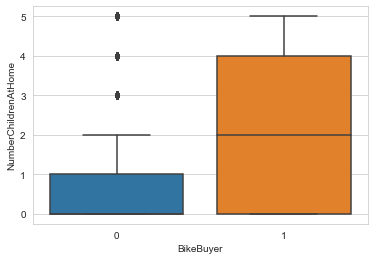

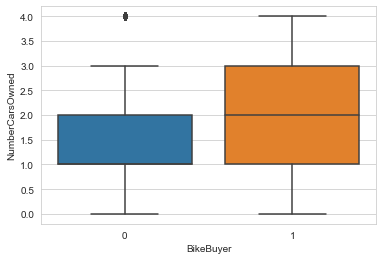

In [13]:
#plot a box plot for numeric variables
def plot_box(adventure_works,cols, col_x='BikeBuyer'):
    for col in cols:
        sns.set_style('whitegrid')
        sns.boxplot(col_x,col,data = adventure_works)
        plt.xlabel(col_x) # set text for x axis
        plt.ylabel(col)#set text for the y axis
        plt.show()

#define our numercic columns
num_cols = ['YearlyIncome','NumberCarsOwned',
           'AveMonthSpend','TotalChildren',
           'NumberChildrenAtHome','NumberCarsOwned'
           ]
plot_box(adventure_works, num_cols)


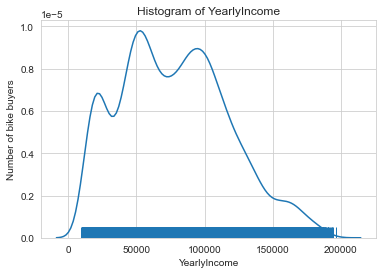

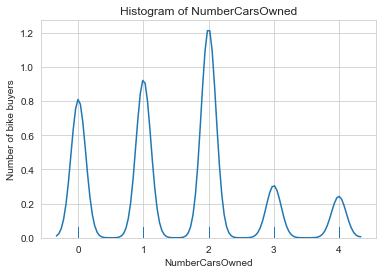

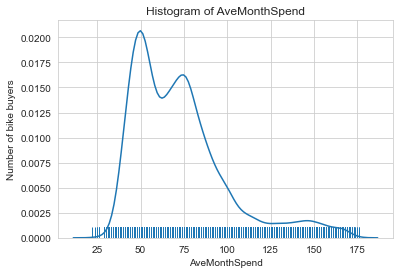

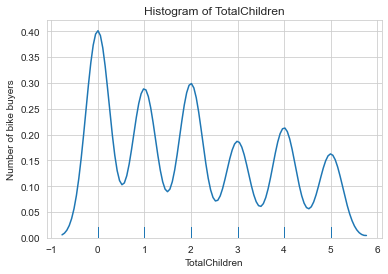

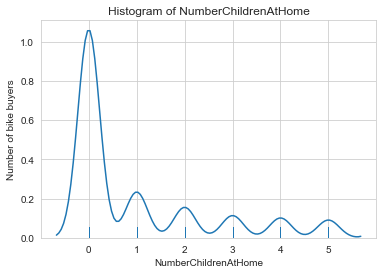

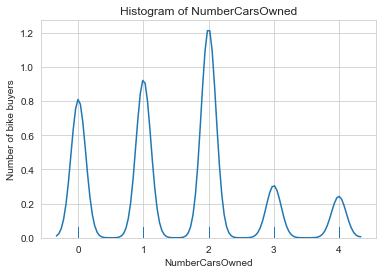

In [14]:
#plot Kernel Density Estimation Plots

def plot_density_hist(adventure_works, cols, bins = 10, hist = False):
    for col in cols:
        sns.set_style("whitegrid")
        sns.distplot(adventure_works[col], bins = bins, rug=True, hist = hist)
        plt.title('Histogram of ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel('Number of bike buyers')# Set text for y axis
        plt.show()
        
plot_density_hist(adventure_works, num_cols)

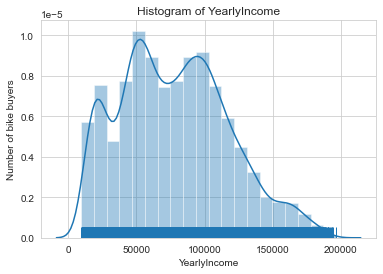

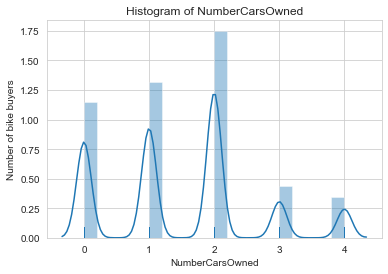

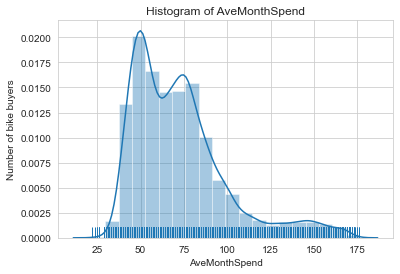

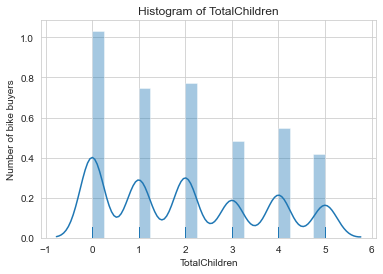

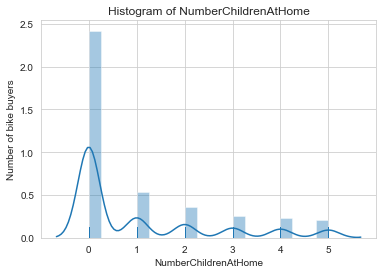

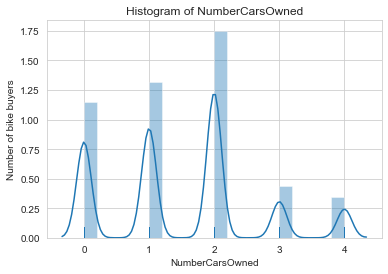

In [15]:
#combined Histogram and KDE'S
plot_density_hist(adventure_works, num_cols, bins = 20, hist = True)

In [16]:
# data preparation

In [17]:
#call the data again
adventure_works.head()

,CustomerID,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,dummy
0,11000,Queensland,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,55,1.0
1,11001,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,56,1.0
2,11002,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,55,1.0
3,11003,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,53,1.0
4,11004,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,53,1.0


In [18]:
adventure_works.shape

(16519, 17)

In [19]:
#check if we have any missing values on our dataset
(adventure_works.astype(np.object)=='?').any()

CustomerID              False
StateProvinceName       False
CountryRegionName       False
BirthDate               False
Education               False
Occupation              False
Gender                  False
MaritalStatus           False
HomeOwnerFlag           False
NumberCarsOwned         False
NumberChildrenAtHome    False
TotalChildren           False
YearlyIncome            False
AveMonthSpend           False
BikeBuyer               False
Age                     False
dummy                   False
dtype: bool

In [20]:
#check again if we have any other missing columns
adventure_works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16519 entries, 0 to 16518
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            16519 non-null  int64  
 1   StateProvinceName     16519 non-null  object 
 2   CountryRegionName     16519 non-null  object 
 3   BirthDate             16519 non-null  object 
 4   Education             16519 non-null  object 
 5   Occupation            16519 non-null  object 
 6   Gender                16519 non-null  object 
 7   MaritalStatus         16519 non-null  object 
 8   HomeOwnerFlag         16519 non-null  int64  
 9   NumberCarsOwned       16519 non-null  int64  
 10  NumberChildrenAtHome  16519 non-null  int64  
 11  TotalChildren         16519 non-null  int64  
 12  YearlyIncome          16519 non-null  int64  
 13  AveMonthSpend         16519 non-null  int64  
 14  BikeBuyer             16519 non-null  int64  
 15  Age                

In [21]:
# we dont have any missing value in our dataset

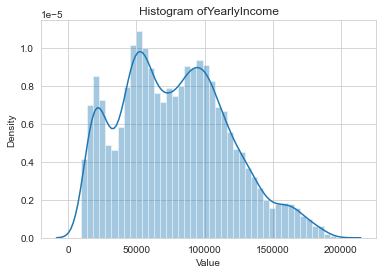

In [22]:
# transforming numeric varibales
#plot the data first to see if we need to transform our numeric values

def hist_plot(vals,lab):
    ##distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

##labels = np.array(auto_prices)
hist_plot(adventure_works['YearlyIncome'],'YearlyIncome')
    

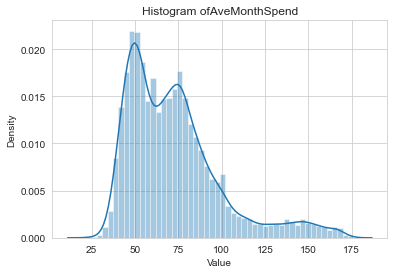

In [23]:
def hist_plot(vals,lab):
    ##distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

##labels = np.array(auto_prices)
hist_plot(adventure_works['AveMonthSpend'],'AveMonthSpend')
    

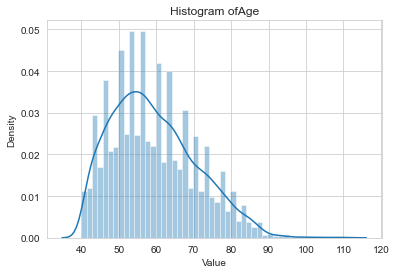

In [24]:
def hist_plot(vals,lab):
    ##distribution plot of values
    sns.distplot(vals)
    plt.title('Histogram of' + lab)
    plt.xlabel('Value')
    plt.ylabel('Density')

##labels = np.array(auto_prices)
hist_plot(adventure_works['Age'],'Age')
    

In [25]:
#NB: our values were not aggregated here


In [26]:
# remove duplicate rows
count_duplicates = adventure_works.shape[0]
unique_df = adventure_works.CustomerID.unique().shape[0]
print('Total:', count_duplicates,
     'Unique:', unique_df)
print(count_duplicates-unique_df)

Total: 16519 Unique: 16404
115


In [27]:
#remove duplicates and keep the latest
print(count_duplicates)
adventure_works.drop_duplicates(subset='CustomerID', keep = 'last',inplace = True)
print(adventure_works.shape[0])

16519
16404


In [28]:
adventure_works.head(5)

,CustomerID,StateProvinceName,CountryRegionName,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,Age,dummy
0,11000,Queensland,Australia,08/04/1966,Bachelors,Professional,M,M,1,0,0,2,137947,89,0,55,1.0
1,11001,Victoria,Australia,14/05/1965,Bachelors,Professional,M,S,0,1,3,3,101141,117,1,56,1.0
2,11002,Tasmania,Australia,12/08/1965,Bachelors,Professional,M,M,1,1,3,3,91945,123,0,55,1.0
3,11003,New South Wales,Australia,15/02/1968,Bachelors,Professional,F,S,0,1,0,0,86688,50,0,53,1.0
4,11004,New South Wales,Australia,08/08/1968,Bachelors,Professional,F,S,1,4,5,5,92771,95,1,53,1.0


In [29]:
#prepare a numpy array for the label values
labels = np.array(adventure_works['BikeBuyer'])

In [30]:
#encode categorical variables
# Encode categorical data
def encode_string(cat_features):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Occupation',
                       'Gender','MaritalStatus']

#Feature under which country or what??
Features = encode_string(adventure_works['CountryRegionName'])

for col in categorical_columns:
    temp = encode_string(adventure_works[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)

(16404, 20)


In [31]:
# Add numerical feature
# This are the features that will be used under tests
Features = np.concatenate([Features, np.array(adventure_works[['NumberCarsOwned',
                                                        'NumberChildrenAtHome',
                                                        'TotalChildren',
                                                        'YearlyIncome','Age',
                                                              'HomeOwnerFlag']])], axis = 1)

print(Features.shape)

(16404, 26)


In [32]:
## Randomly sample cases to create independent training and test data
nr.seed(9988)
indx = range(Features.shape[0])
indx = ms.train_test_split(indx, test_size = 0.3)
X_train = Features[indx[0],:]
y_train = np.ravel(labels[indx[0]])
X_test = Features[indx[1],:]
y_test = np.ravel(labels[indx[1]])

In [33]:
#sacale the numeric variables using the z score standard scaler
scaler = preprocessing.StandardScaler().fit(X_train[:,23:])
X_train[:,23:] = scaler.transform(X_train[:,23:])
X_test[:,23:] = scaler.transform(X_test[:,23:])

In [34]:
# create a logistic regression model
#NB_mod = GaussianNB()
nn_mod = MLPClassifier(hidden_layer_sizes = (50,))
#logistic_mod = linear_model.LogisticRegression()
svm_mod = svm.LinearSVC()


nn_mod.fit(X_train, y_train)

C:\Users\IFB19-039\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(50,))

In [35]:
logistic_mod = linear_model.LogisticRegression() 
logistic_mod.fit(X_train, y_train)

LogisticRegression()

In [36]:
#print out the probabilities
probabilities = logistic_mod.predict_proba(X_test)
print(probabilities)

[[0.68669346 0.31330654]
 [0.54073316 0.45926684]
 [0.60302513 0.39697487]
 ...
 [0.89820367 0.10179633]
 [0.72999477 0.27000523]
 [0.97007684 0.02992316]]


In [37]:
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)
print(np.array(scores))
print(y_test)

[0 0 0 ... 0 0 0]
[1 0 1 ... 0 0 0]


In [38]:
#print the metrics
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)   

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2956               348
Actual negative       712               906

Accuracy  0.78
 
           Positive      Negative
Num case     3304          1618
Precision    0.81          0.72
Recall       0.89          0.56
F1           0.85          0.63


In [39]:
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores)

                 Confusion matrix
                 Score positive    Score negative
Actual positive      2956               348
Actual negative       712               906

Accuracy  0.78
 
           Positive      Negative
Num case     3304          1618
Precision    0.81          0.72
Recall       0.89          0.56
F1           0.85          0.63


In [40]:
### test new data

In [41]:
ads_test = pd.read_csv(r"C:\Users\IFB19-039\Desktop\mlp\AW_test.csv")
ads_test.head()

,CustomerID,Title,FirstName,MiddleName,LastName,Suffix,AddressLine1,AddressLine2,City,StateProvinceName,...,BirthDate,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome
0,18988,NaN,Courtney,A,Baker,NaN,8727 Buena Vista Ave.,NaN,Fremont,California,...,1/5/1945,Bachelors,Management,F,S,0,2,0,5,86931
1,29135,NaN,Adam,C,Allen,NaN,3491 Cook Street,NaN,Haney,British Columbia,...,10/4/1964,Bachelors,Skilled Manual,M,M,1,2,2,4,100125
2,12156,NaN,Bonnie,NaN,Raji,NaN,359 Pleasant Hill Rd,NaN,Burbank,California,...,1/12/1934,Graduate Degree,Management,F,M,1,2,0,4,103985
3,13749,NaN,Julio,C,Alonso,NaN,8945 Euclid Ave.,NaN,Burlingame,California,...,9/22/1958,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161
4,27780,NaN,Christy,A,Andersen,NaN,"42, boulevard Tremblay",NaN,Dunkerque,Nord,...,3/19/1965,High School,Manual,F,M,1,1,2,2,21876


In [42]:
# calculate age based on customer birthdate
# Calculate age of customer based on birthdate
def calculate_age(end):
    r = relativedelta(pd.to_datetime('now'), pd.to_datetime(end)) 
    return '{}'.format(r.years)


ads_test['Age'] = ads_test['BirthDate'].apply(calculate_age)

# Convert age to integer
ads_test['Age'] = ads_test['Age'].astype('int64')

In [43]:
# what data are we testing?
ads_totest = ads_test[['CountryRegionName','Education','Occupation','Gender',
                      'MaritalStatus','HomeOwnerFlag','NumberCarsOwned',
                      'NumberChildrenAtHome','TotalChildren','YearlyIncome',
                      'Age']]

ads_totest.head()

,CountryRegionName,Education,Occupation,Gender,MaritalStatus,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,Age
0,United States,Bachelors,Management,F,S,0,2,0,5,86931,76
1,Canada,Bachelors,Skilled Manual,M,M,1,2,2,4,100125,57
2,United States,Graduate Degree,Management,F,M,1,2,0,4,103985,87
3,United States,Graduate Degree,Skilled Manual,M,M,1,0,0,4,127161,63
4,France,High School,Manual,F,M,1,1,2,2,21876,56


In [44]:
# Encode categorical data
def encode_string(cat_features):
    
    ## First encode the strings to numeric categories
    enc = preprocessing.LabelEncoder()
    enc.fit(cat_features)
    enc_cat_features = enc.transform(cat_features)
    
    ## Now, apply one hot encoding
    ohe = preprocessing.OneHotEncoder()
    encoded = ohe.fit(enc_cat_features.reshape(-1,1))
    return encoded.transform(enc_cat_features.reshape(-1,1)).toarray()

categorical_columns = ['Education','Occupation',
                       'Gender','MaritalStatus']

Features = encode_string(ads_totest['CountryRegionName'])

for col in categorical_columns:
    temp = encode_string(ads_totest[col])
    Features = np.concatenate([Features, temp], axis = 1)
    
print(Features.shape)

(500, 20)


In [45]:
# Add numerical feature
Features = np.concatenate([Features, np.array(ads_totest[['NumberCarsOwned',
                                                        'NumberChildrenAtHome',
                                                        'TotalChildren',
                                                        'YearlyIncome','Age',
                                                         'HomeOwnerFlag']])], axis = 1)

print(Features.shape)

(500, 26)


In [46]:
X_test = Features
X_test[:,23:] = scaler.transform(X_test[:,23:])

In [47]:
# print out the scores
scores = nn_mod.predict(X_test)
print(scores)

[0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 1
 0 0 0 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0
 0 1 1 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 1 1 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 1 0 0 0 1
 0 0 0 1 0 1 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1
 1 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1
 0 1 1 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0
 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 0 1 0 0 0 0 0 0 0 1 1 0 

In [48]:
result = pd.DataFrame(scores, index = ads_test['CustomerID'],columns=['BikeBuyer'])

result
result.to_csv('niv_niv_classification.csv')

In [49]:
# lets try Knns
#lets try KNNS
x = adventure_works[['Age','TotalChildren','HomeOwnerFlag',
                     'NumberChildrenAtHome','NumberCarsOwned',
                     'HomeOwnerFlag']]
      
y = adventure_works['BikeBuyer'] # bike buyer
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y,random_state=0)

#create an instance of the classifier object
from sklearn.neighbors import KNeighborsClassifier

#set the important parameters to be used by the classifer
knn = KNeighborsClassifier(n_neighbors=5).fit(X_train,y_train)

#print the scores for KNN
knn.score(X_test,y_test)

0.7488417459156304